In [5]:
import feedparser
import pandas as pd
from urllib.parse import quote

queries = [
    "India AI summit",
    "India artificial intelligence",
    "AI startups India",
    "AI investment India"
]

articles = []

for query in queries:
    encoded_query = quote(query)
    url = f"https://news.google.com/rss/search?q={encoded_query}"

    feed = feedparser.parse(url)

    for entry in feed.entries:
        articles.append({
            "title": entry.title,
            "source": entry.source.title if "source" in entry else None,
            "published": entry.published if "published" in entry else None,
            "link": entry.link,
            "search_topic": query
        })

df = pd.DataFrame(articles)

# remove duplicates
df = df.drop_duplicates(subset="title")

# save dataset
df.to_csv("india_ai_news.csv", index=False)

print("Articles collected:", len(df))

Articles collected: 349


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import os
import re

os.makedirs("images", exist_ok=True)

sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("india_ai_news.csv")

print("Dataset size:", len(df))
print(df.head())

Dataset size: 349
                                               title    source  \
0  Chaos, confusion and $200 billion dreams: What...      CNBC   
1  India opens 'world's biggest' AI summit, but w...       CNN   
2  Bill Gates pulls out of India AI summit amid E...  NBC News   
3  Modi’s AI summit turns awkward as tech leaders...   AP News   
4  Video: Shirts Off, Youth Congress Workers Prot...      NDTV   

                       published  \
0  Sat, 21 Feb 2026 08:50:57 GMT   
1  Fri, 20 Feb 2026 07:35:54 GMT   
2  Fri, 20 Feb 2026 09:43:29 GMT   
3  Thu, 19 Feb 2026 17:27:00 GMT   
4  Fri, 20 Feb 2026 08:13:00 GMT   

                                                link     search_topic  
0  https://news.google.com/rss/articles/CBMiaEFVX...  India AI summit  
1  https://news.google.com/rss/articles/CBMilAFBV...  India AI summit  
2  https://news.google.com/rss/articles/CBMihwFBV...  India AI summit  
3  https://news.google.com/rss/articles/CBMimwFBV...  India AI summit  
4  https

In [9]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["title"].apply(get_sentiment)

df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

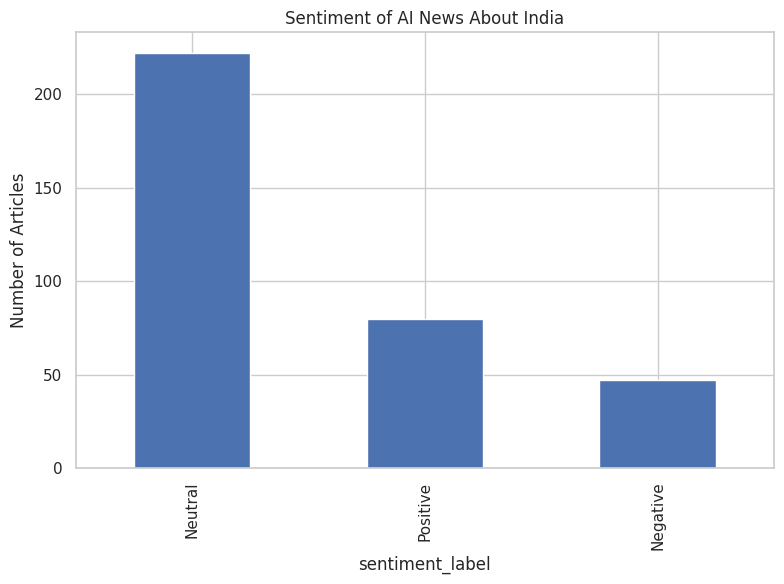

In [10]:
sentiment_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(8,6))
sentiment_counts.plot(kind="bar")

plt.title("Sentiment of AI News About India")
plt.ylabel("Number of Articles")

plt.tight_layout()
plt.savefig("images/sentiment_distribution.png")
plt.show()

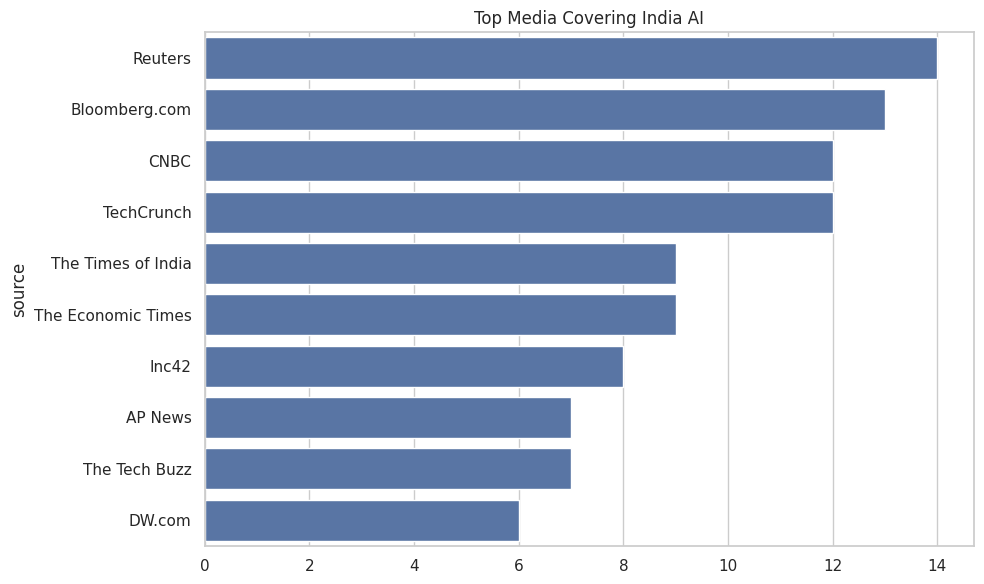

In [11]:
top_sources = df["source"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sources.values, y=top_sources.index)

plt.title("Top Media Covering India AI")

plt.tight_layout()
plt.savefig("images/top_sources.png")
plt.show()

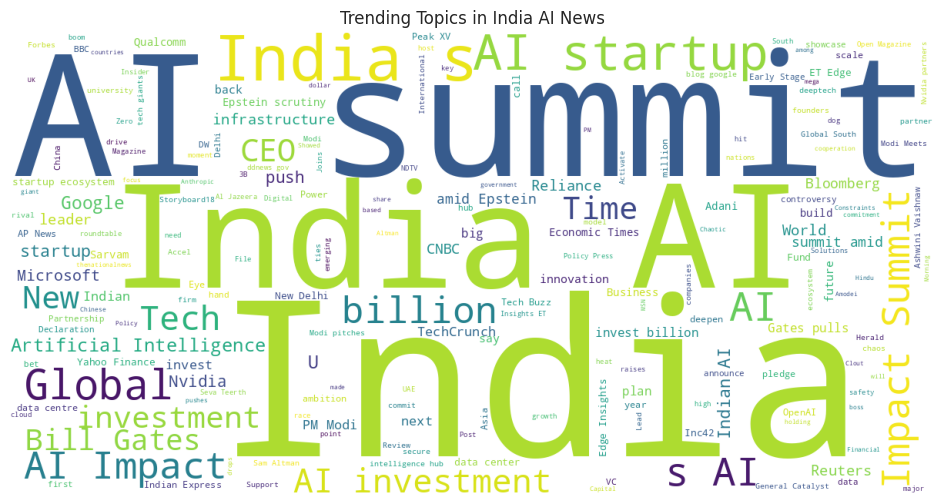

In [12]:
text = " ".join(df["title"].astype(str))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")

plt.title("Trending Topics in India AI News")

plt.savefig("images/ai_wordcloud.png")
plt.show()

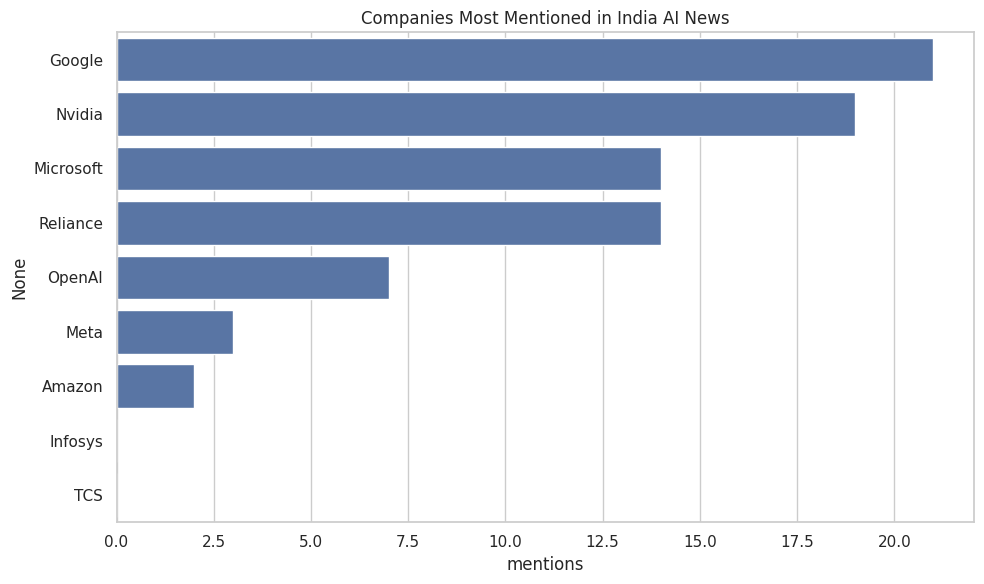

In [13]:
companies = [
    "Google", "Microsoft", "Nvidia", "OpenAI",
    "Infosys", "TCS", "Reliance", "Meta", "Amazon"
]

company_counts = {}

for company in companies:
    count = df["title"].str.contains(company, case=False).sum()
    company_counts[company] = count

company_df = pd.DataFrame.from_dict(
    company_counts, orient="index", columns=["mentions"]
).sort_values("mentions", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=company_df["mentions"], y=company_df.index)

plt.title("Companies Most Mentioned in India AI News")

plt.tight_layout()
plt.savefig("images/company_mentions.png")
plt.show()